### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


## Data Acquisition and Collection
###### Acquire the necessary data from Mall_Customers.csv

In [3]:
# Read the .CSV file
df = pd.read_csv("/home/felipe/Documents/tier0/segment-shopping-customer/mall_customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
295,296,Male,44,78,40
296,297,Female,66,35,20
297,298,Female,51,54,39
298,299,Male,35,30,96


## Data Preprocessing
###### Performing data preprocessing tasks such as encoding.

In [4]:
df = df.drop("CustomerID", axis=1)
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
295,Male,44,78,40
296,Female,66,35,20
297,Female,51,54,39
298,Male,35,30,96
299,Male,51,84,96


## Exploratory Data Analysis (EDA)
###### Exploring the dataset to gain insights into its structure, patterns, and relationships, and visualizing the data using charts, graphs, and summary statistics to identify trends, correlations, and anomalies.

#### Univariate analysis

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,300.000000,300.00000,300.000000
mean,40.486667,65.56000,48.936667
std,14.511781,33.36531,26.490599
min,18.000000,10.00000,1.000000
25%,29.000000,39.00000,29.000000
50%,39.000000,62.00000,48.000000
75%,51.000000,85.00000,72.000000
max,70.000000,149.00000,99.000000


##### kernel density estimate (KDE) 

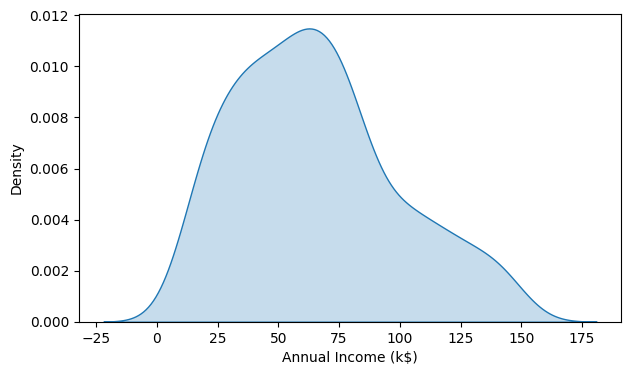

In [6]:
plt.figure(figsize=(7, 4))

# Plot the distribution of Annual Income
sns.kdeplot(data=df["Annual Income (k$)"], shade=True)

plt.show()

##### Histogram

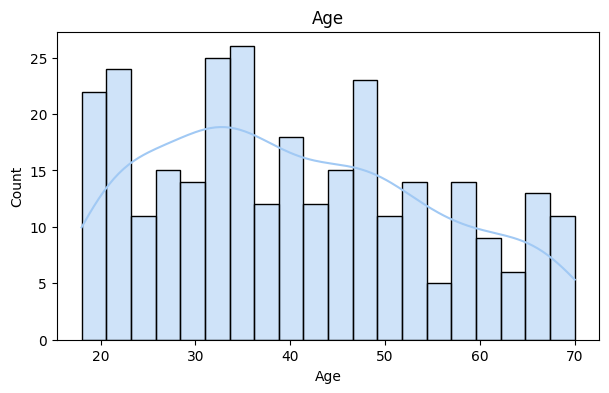

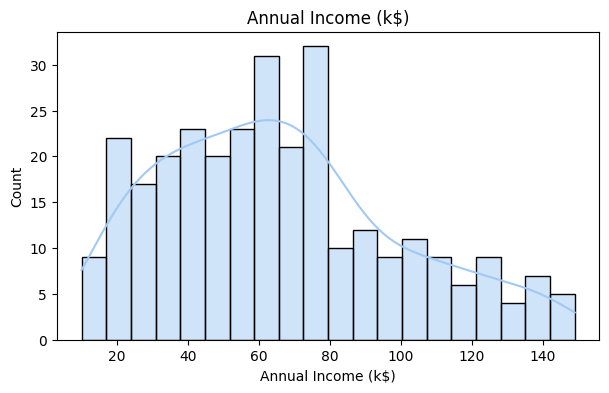

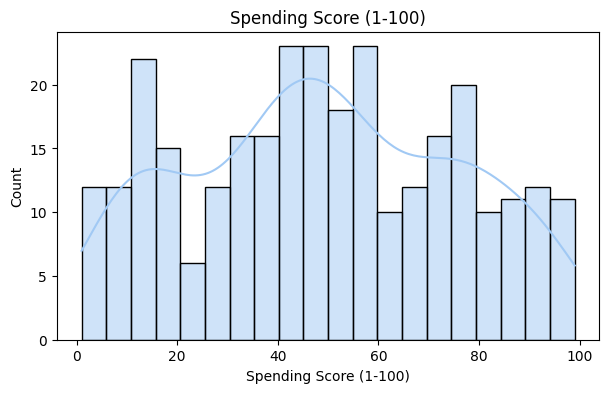

In [7]:
columns = ["Age", "Annual Income (k$)",	"Spending Score (1-100)"]

for c in columns:
    # Set the figure size
    plt.figure(figsize=(7, 4))

    # Customize the color palette
    sns.set_palette("pastel")

    # Plot the distribution of Annual Income
    sns.histplot(data=df[c], bins=20, kde=True)

    # Add title and axis labels
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel("Count")
    
    plt.show()

##### Boxplot

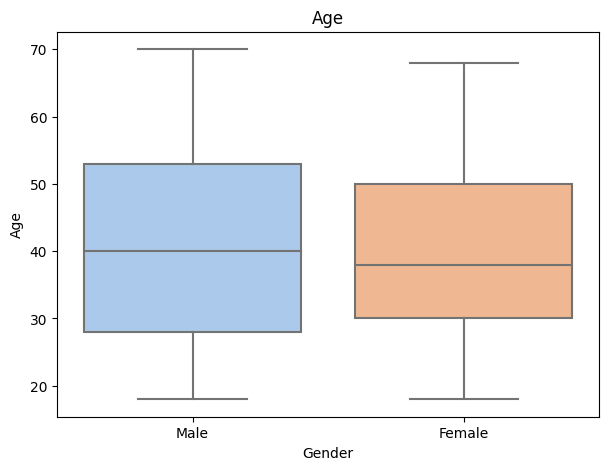

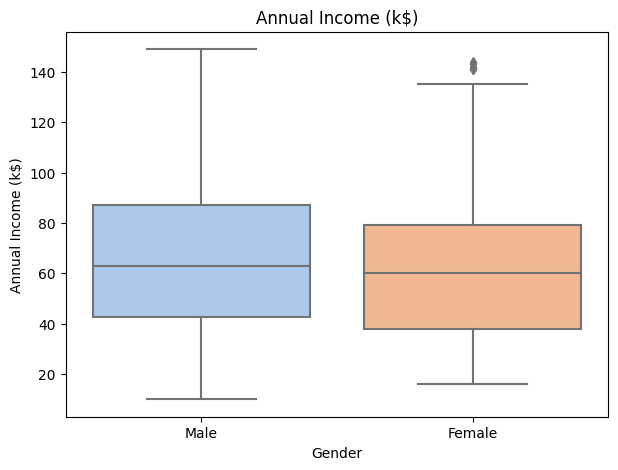

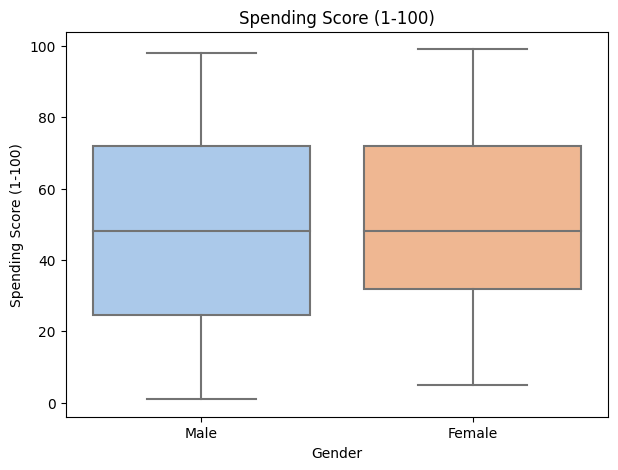

In [8]:
columns = ["Age", "Annual Income (k$)",	"Spending Score (1-100)"]

for c in columns:
    # Set the figure size
    plt.figure(figsize=(7, 5))

    # Plot the distribution of Annual Income
    sns.boxplot(data=df, x="Gender", y=df[c])

    # Add title and axis labels
    plt.title(c)
    plt.xlabel("Gender")
    plt.ylabel(c)
    
    plt.show()

In [9]:
percent_female, percent_male = df["Gender"].value_counts(normalize=True)
print(f"{percent_female} are female and {percent_male} are male")

0.5233333333333333 are female and 0.4766666666666667 are male


#### Bivariate analysis

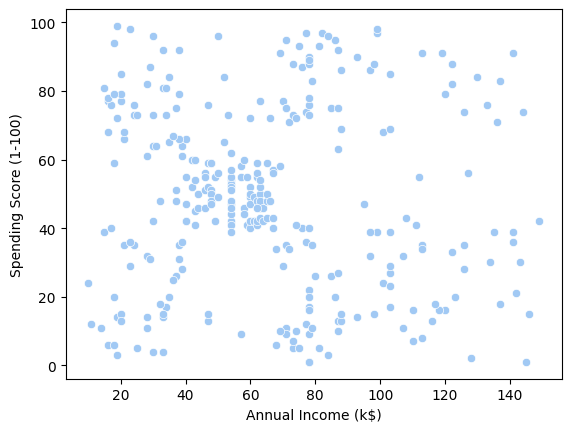

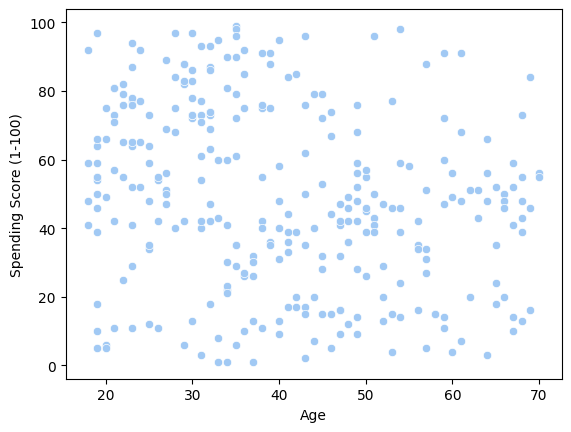

In [10]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.show()

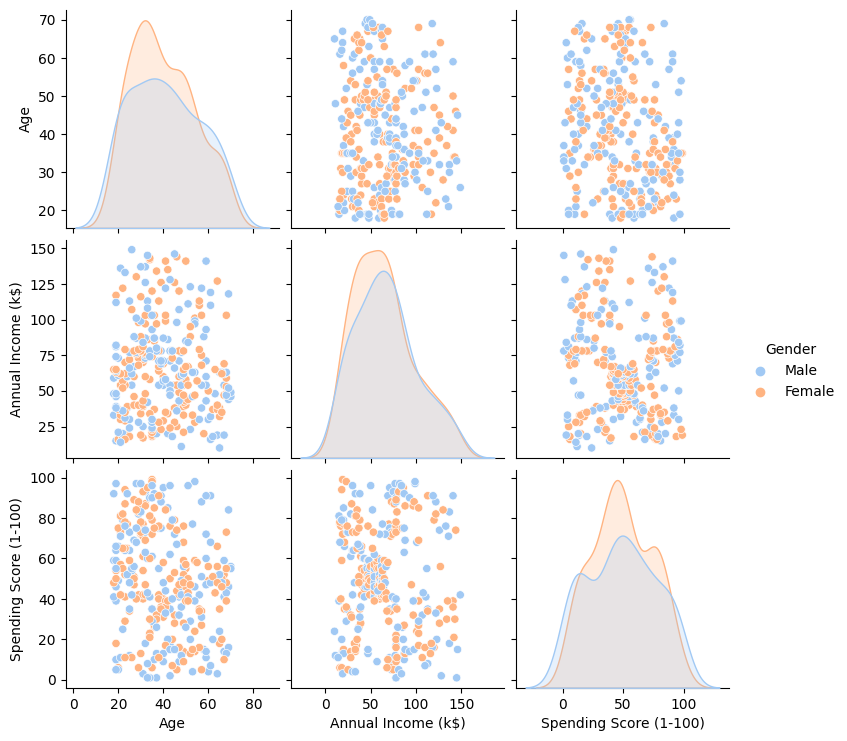

In [11]:
sns.pairplot(df, hue="Gender")
plt.show()

In [12]:
df.groupby(["Gender"])["Age", "Annual Income (k$)",	"Spending Score (1-100)"].mean()

/tmp/ipykernel_19186/1755180588.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Gender"])["Age", "Annual Income (k$)",	"Spending Score (1-100)"].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,40.019108,64.337580,49.210191
Male,41.000000,66.902098,48.636364


##### Correlation

In [13]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.016390,-0.234339
Annual Income (k$),-0.016390,1.000000,-0.078378
Spending Score (1-100),-0.234339,-0.078378,1.000000


<AxesSubplot:>

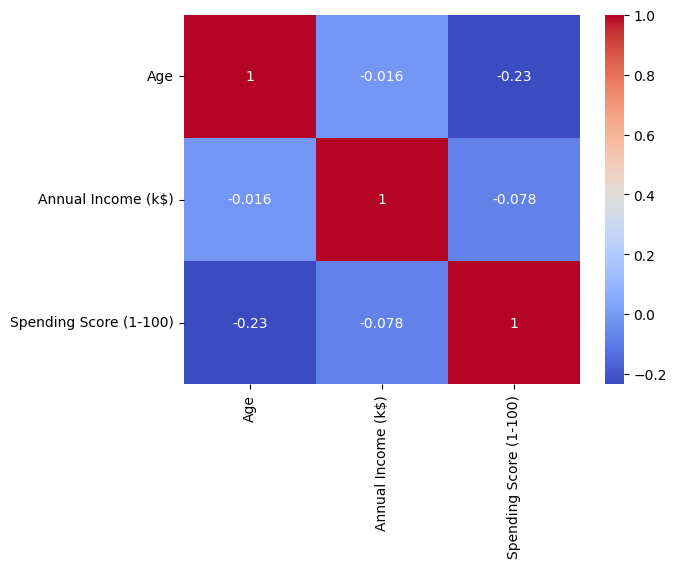

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Model Selection and Training
###### Selected the clustering algorithm(KMeans) to solve the problem.


##### Clustering - Univariate, Bivariate, Multivariate

In [16]:
clustering = KMeans()
clustering.fit(df[["Annual Income (k$)"]])
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6,
       2, 2, 1, 1, 7, 4, 1, 4, 5, 2, 4, 0, 7, 2, 7, 7, 7, 5, 3, 5, 1, 5,
       4, 7, 7, 6, 6, 4, 7, 1, 7, 1, 5, 7, 2, 4, 5, 1, 0, 5, 4, 4, 4, 2,
       2, 6, 2, 6, 3, 3, 7, 6, 3, 3, 3, 7, 4, 3, 5, 1, 6, 7, 6, 2, 2, 7,
       1, 6, 7, 2, 4, 2, 2, 7, 1, 2, 1, 6, 6, 2, 7, 0, 7, 0, 6, 1, 4, 0,
       5, 6, 3, 0, 5, 4, 7, 4, 4, 0, 7, 3, 7, 0], d

In [18]:
df["Income Cluster"] = clustering.labels_
print(df["Income Cluster"].value_counts())
df.tail()

0    60
5    50
7    47
3    45
1    36
4    31
6    16
2    15
Name: Income Cluster, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
295,Male,44,78,40,0
296,Female,66,35,20,7
297,Female,51,54,39,3
298,Male,35,30,96,7
299,Male,51,84,96,0


It is a measure of how tightly the clusters are packed around their centroids.

In [19]:
clustering.inertia_

6083.253633035917

###### This plot helps visualize how the inertia score changes as the number of clusters increases, aiding in the selection of the optimal number of clusters for the dataset.

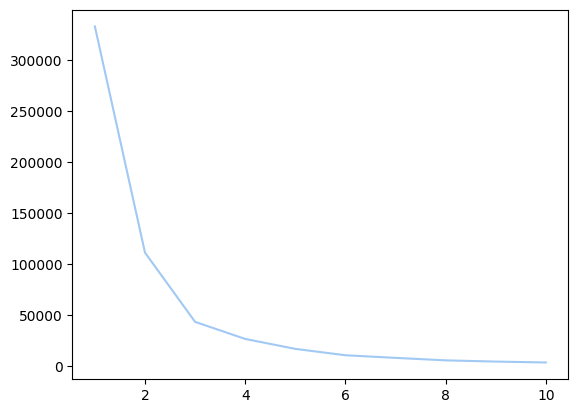

In [27]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_scores)

In [31]:
df.groupby("Income Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

/tmp/ipykernel_19186/3366657240.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Income Cluster")["Age", "Annual Income (k$)", "Spending Score (1-100)"].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.316667,78.850000,48.216667
1,37.000000,18.972222,50.583333
2,36.866667,140.266667,44.400000
3,47.422222,49.155556,52.355556
4,41.903226,103.387097,45.129032
5,41.860000,63.020000,48.740000
6,42.750000,122.625000,45.937500
7,39.829787,34.468085,50.510638
